In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

**Import Library Python **
- numpy adalah library python yang digunakan untuk komputasi numerik dan manipulasi array
- matplotlib adalah library python yang digunakan untuk memvisualisasikan data
- pandas adalah library yang digunakan untuk pengolahan data, pandas bisa mengimpor mengolah dan menganalisis data.

In [2]:
dataset = pd.read_csv("diabetes.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("Jumlah Dataset :",len(dataset))

Jumlah Dataset : 768


Penjelasan line code

Dataset diambil dari google drive dengan fungsi drive.mount

1. pd.read_csv -> library pandas dan functionnya, digunakan untuk mengimport data dari file
2. dataset.iloc[:, :-1].values ->
  - iloc digunakan untuk mengakses dataframe dalam posisi indeks, berdasarkan baris dan kolom.
      + code diatas menunjukan dia akan mengambil semua baris dan kolom kecuali indeks yang terakhir
      + [:, -1] -> artinya dia mengambil semua baris dan kolom terakhir saja

In [3]:

x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.25, random_state =0)

print("Dataset Training =",len(x_train))
print("Dataset Testing =",len(x_test))

Dataset Training = 576
Dataset Testing = 192


Penjelasan Line Code
1. from sklearn.model_selection import train_test_split
    + sklearn sendiri scikit-learn, library untuk data mining/ machine learning
  - Code diatas digunakan untuk membagi dataset menjadi data training dan data testing
2. ( x, y , test_size = 0.25, random_state =0)
  - x dan y adalah data yang ingin dibagi
  - test_size adalah ukuran data testing dalam persen
  - random_state digunakan untuk memastikan pembagian dataset training dan dataset testing konsisten

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


Penjelasan Line Code
1. from sklearn.preprocessing import StandardScaler
  Standard scaler digunakan untuk normalisasi data agar data tidak memiliki penyimpangan/rentang nilai yang besar
2. fit_transform digunakan untuk menghitung mean dan standard deviasi dan mentransformasikan nilai nilainya
3. transform digunakan untuk mengubah nilai nilai berdasarkan mean dan standard deviasi

In [5]:
from sklearn.naive_bayes import GaussianNB # gaussian karena datanya numerik
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Penjelasan Line Code
1. GaussianNB adalah salah satu fungsi dalam modul naive bayes yang digunakan untuk data numerik
2. fit digunakan untuk melatih X dengan target Y

In [6]:
y_pred = classifier.predict(x_test)

Penjelasan line code
1. predict digunaakn untuk memprediksi dataset berdasarkan model yang telah dilatih

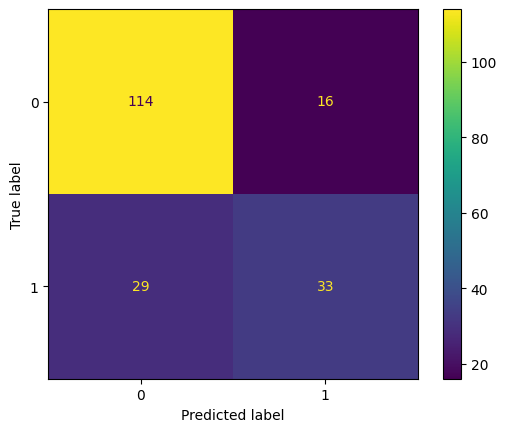

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

Penjelasan line code
1. Confusion Matrix digunakan untuk menggambarkan performa model klasifikasi pada suatu dataset
  - [ [TP, FN]
      {FP, TN] ]
      + TP, (TRUE POSITIVE) Maksudnya model secara benar memprediksi sampel yang labelnya positif
      + TN, (TRUE NEGATIVE) Maksudnya model secara benar memprediksi sampel yang labelnya negatif
      + FP, (FALSE POSITIVE) Maksudnya model secara salah mempredisksi sampel yang labelnya positif Seharusnya Negatif
      + FN, (FALSE NEGATIVE) Maksudnya model secara salah memprediksi sampel yang labelnya negatif seharusnya Positif

      + Tujuan yang seharusnya dicapai adalah mencapai TP dan TN sebanyak mungkin dan meminimalkan FP dan FN

      + Jika seluruh nilai pada matriks ditambahkan akan menghasilkan total data uji


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



Penjelasan Line code
1. accuracy score digunakan untuk menghitung akurasi dari model klasifikasi
2. Precision digunakan untuk Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
3. Recall Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
4. f1 score perbandingan rata-rata presisi dan recall yang dibobotkan
5. Support adalah jumlah data

In [9]:
Pregnancies = 5
Glucose = 116
BloodPressure = 74
Skin_Thickness = 0
Insulin = 0
BMI = 25.6
DiabetesPredigreeFunction = 0.201
Age = 30

input_sample = [[Pregnancies, Glucose, BloodPressure, Skin_Thickness, Insulin, BMI, DiabetesPredigreeFunction, Age]]
input_np_array = np.asarray(input_sample)
input_np_array_reshaped = input_np_array.reshape(1,-1)

In [10]:
std_data = sc.transform(input_np_array_reshaped)
print(std_data)

[[ 0.33884418 -0.1627895   0.2272108  -1.31921491 -0.71823753 -0.83093587
  -0.8056032  -0.29878768]]


Standard scaler digunakan untuk normalisasi data agar data tidak memiliki penyimpangan/rentang nilai yang besar

In [11]:
prediction = classifier.predict(std_data)

In [12]:
if (prediction[0]==0):
  print("Dia Tidak Terkena Diabetes")
elif (prediction[1]==1):
  print("Dia Terkena Diabetes")
else:
  print("Eror")

Dia Tidak Terkena Diabetes


In [13]:
import pickle
filename = "diabetes_model.pkl"
pickle.dump(classifier,open(filename,'wb'))